UNIFIED MENTOR

programe: Data Science Advance Course

Task: Exploratory Data Analysis on Heart Disease Data

Name: Vaishali Yadav

Intern Id: UM20230953






As a Health Data Analyst my main obejective for this analysis includes:
1.   Cleaning and Transformation of Data
2.   Number of patients diagnosed with heart disease.
3.   Distribution of diseased patients based on gender.
4.   Analysis concerning age:
    1.  Gender-specific impact of age on cholesterol levels.
    2.  Influence of age on blood pressure.
    3. Relationship between heart rate and age among diseased patients.
5. Examination of diseased patients with respect to categorical features:
    1. 'Resting Electrocardiogram (ECG)'.
    2.   Presence of angina.
    3.   Slope of ST segment.
    4.   Number of major vessels colored by fluoroscopy('ca').  
    5.   Type of thalassemia.
    6.   Chest pain type.
    7.   Fasting blood sugar levels.


In [21]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import missingno as msno

In [22]:
#Load The DataSet
df=pd.read_csv('/content/drive/MyDrive/UM_python_assignment/Heart Disease data.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [23]:
df.shape

(1025, 14)

This Dataset Consist of 1025 rows and 14 columns

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#Cleaning and Transformation of Dataset

In [25]:
#check for null values if any
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

<Axes: >

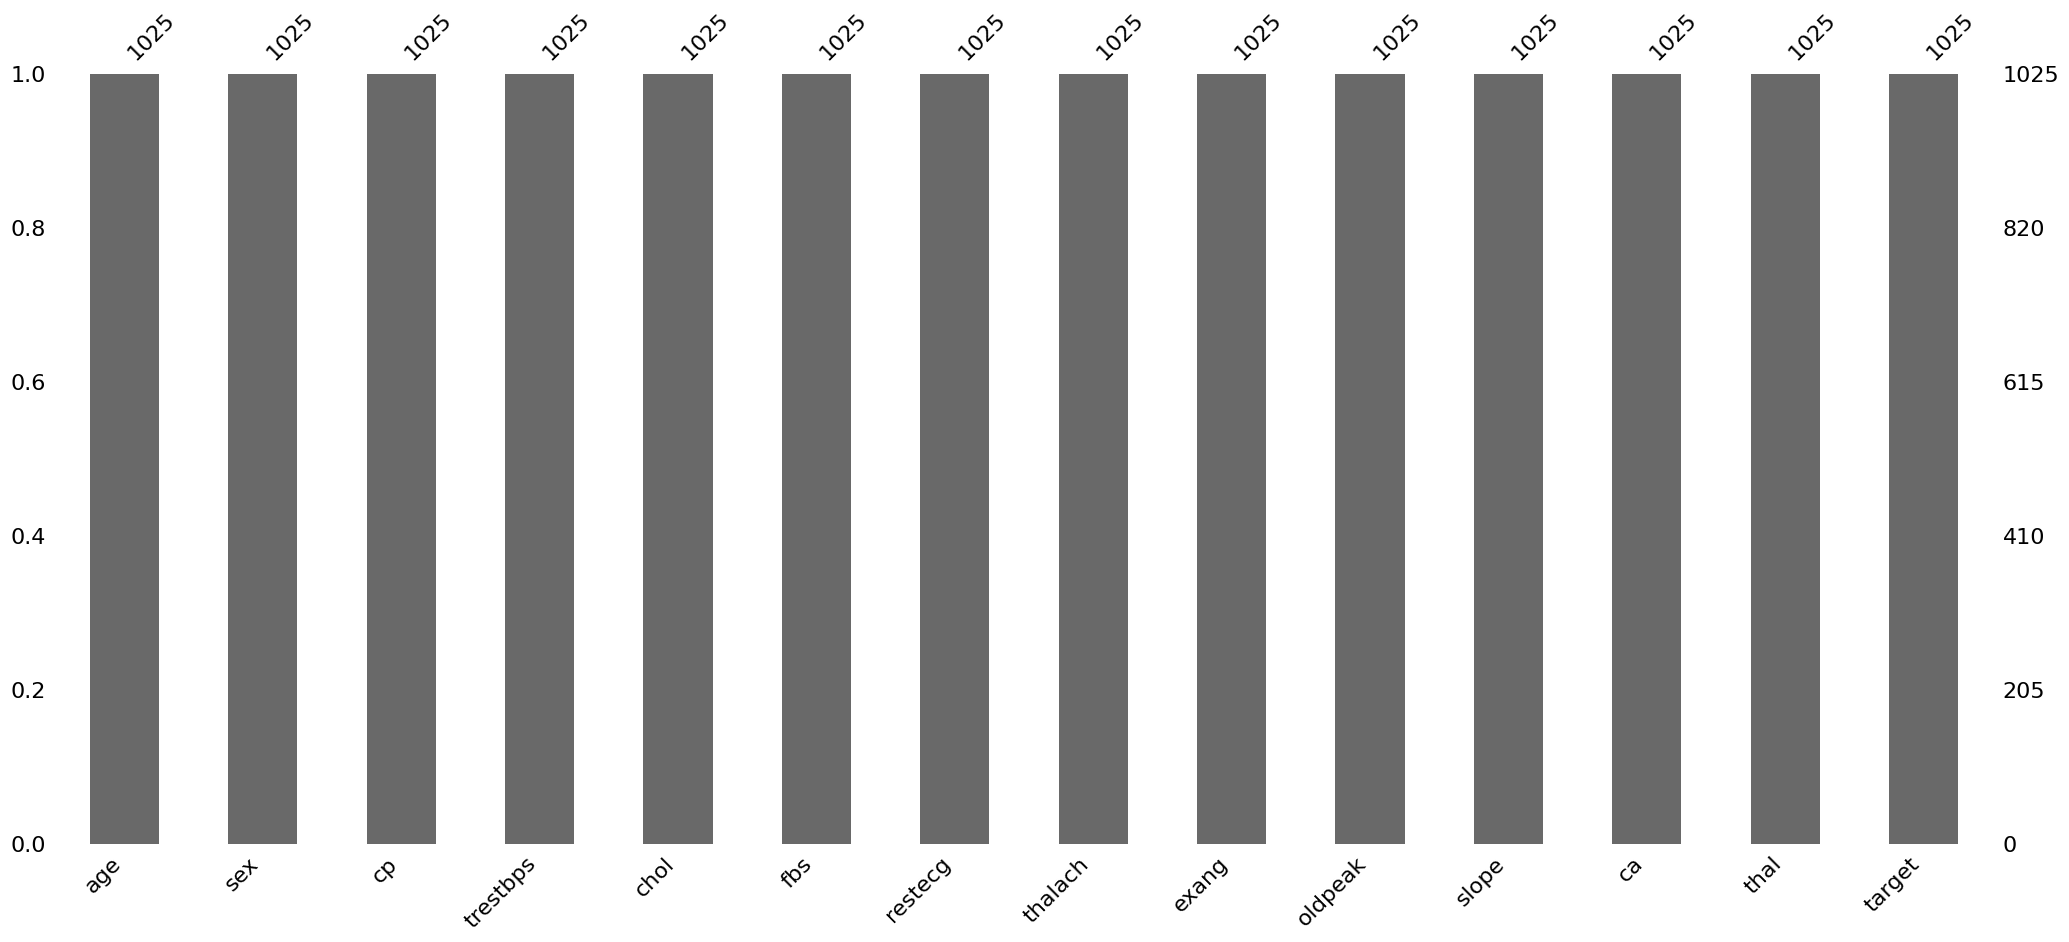

In [26]:
msno.bar(df)

In [27]:
#check for duplicate rows if any
df.duplicated().sum()

723

In [28]:
#droping duplicates
df.drop_duplicates(inplace=True)


In [29]:
df.shape

(302, 14)

After dropping duplicates now the length of dataset is 302 rows and 14 columns

In [30]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [31]:
#Changing the datatype of columns according to entries
convert_dict={ 'sex': object,
              'cp': object,
              'fbs':   object,
'restecg':   object,
'exang'  :   object,
'slope'  :   object,
'ca'   :   object,
'thal'   :   object,
'target'   :   object

}

df = df.astype(convert_dict)
print(df.dtypes)

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object


In [32]:
#Renaming the features
df=df.rename({'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_BP','chol':'Cholestrol','fbs':'Fasting_bloodSugar',
           'restecg':'Resting_ECG','thalach':'Max_heartRate','exang':'angina','oldpeak':'ST_Depression','slope':'Slope_ST_Segment',
           'ca':'ca','thal':'Thalassemia','target':'Target'},axis=1)

df.columns

Index(['Age', 'Sex', 'Chest_pain', 'Resting_BP', 'Cholestrol',
       'Fasting_bloodSugar', 'Resting_ECG', 'Max_heartRate', 'angina',
       'ST_Depression', 'Slope_ST_Segment', 'ca', 'Thalassemia', 'Target'],
      dtype='object')

In [33]:
#Replace the values of columns for better understanding
df['Sex']=df['Sex'].replace([0,1],['Female','Male'])
df['Resting_ECG']=df['Resting_ECG'].replace([0,1,2],['Norm','abnormal','hyper'])
df['Fasting_bloodSugar'] = df['Fasting_bloodSugar'].replace([1,0],['Yes','No'])
df['angina'] = df['angina'].replace([1,0],['Yes','No'])
df['Slope_ST_Segment']=df['Slope_ST_Segment'].replace([0,1,2],['Up', 'flat', 'down'])
df['Target'] = df['Target'].replace([1,0],['Yes','No'])

In [34]:
#unique entries in dataset
df.nunique()

Age                    41
Sex                     2
Chest_pain              4
Resting_BP             49
Cholestrol            152
Fasting_bloodSugar      2
Resting_ECG             3
Max_heartRate          91
angina                  2
ST_Depression          40
Slope_ST_Segment        3
ca                      5
Thalassemia             4
Target                  2
dtype: int64

In [35]:
df.describe()

,Age,Resting_BP,Cholestrol,Max_heartRate,ST_Depression
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


#Number of patients diagnosed with heart disease.

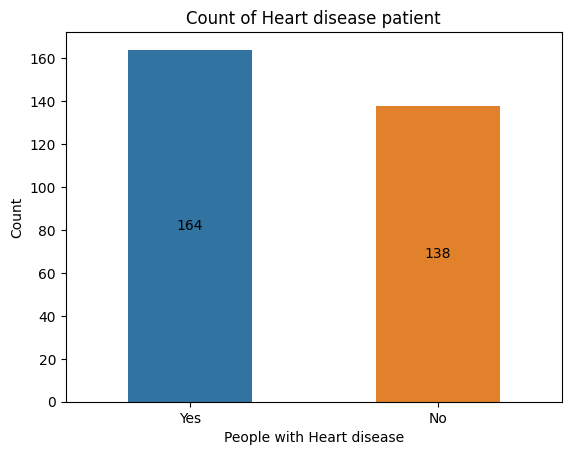

In [36]:
g=sns.countplot(data=df,
    x='Target',width=0.5,order=df.Target.value_counts(ascending=False).index)
sns.color_palette('colorblind')
plt.xlabel('People with Heart disease')
plt.ylabel('Count')
plt.title('Count of Heart disease patient')
g.bar_label(container=g.containers[0],labels=df.Target.value_counts(ascending=False).values,label_type='center')
plt.show()

164 patient diagonised with heart disease

#Distribution of Numerical features

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Resting_BP'}>,
        <Axes: title={'center': 'Cholestrol'}>],
       [<Axes: title={'center': 'Max_heartRate'}>,
        <Axes: title={'center': 'ST_Depression'}>, <Axes: >]],
      dtype=object)

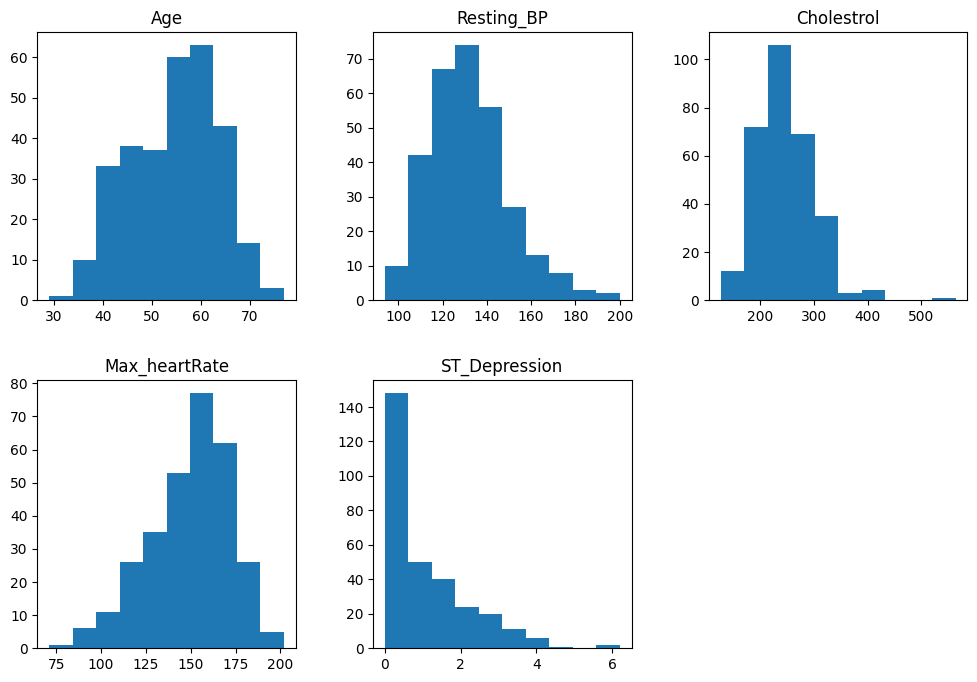

In [37]:
num_feature=[x for x in df.columns if df[x].dtypes != 'object']
df.hist(column=num_feature, by=None, grid=False, figsize=(12,8), layout=(2,3), bins=10)

#Distribution of diseased patients based on gender.

<Axes: xlabel='Target', ylabel='Sex'>

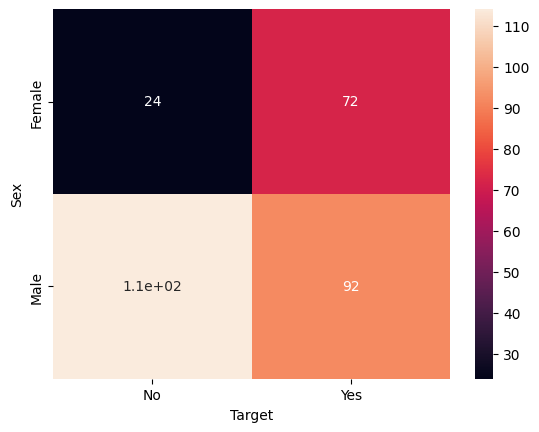

In [38]:
sns.heatmap(pd.crosstab(df['Sex'],df['Target']),annot=True)

#Analysis concerning age:


<Axes: xlabel='Age', ylabel='Cholestrol'>

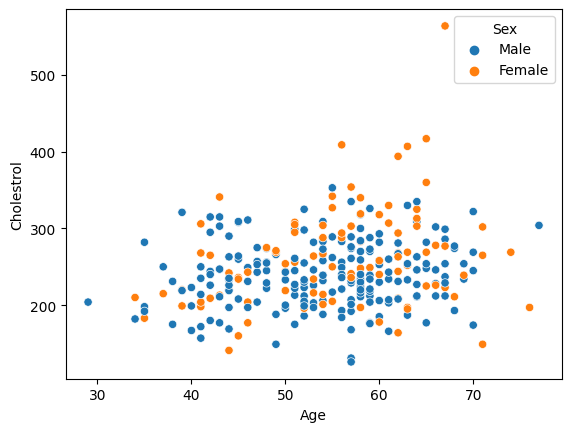

In [39]:
#Gender-specific impact of age on cholesterol levels
sns.scatterplot(data=df,x='Age',y='Cholestrol',hue='Sex')

<Axes: xlabel='Age', ylabel='Resting_BP'>

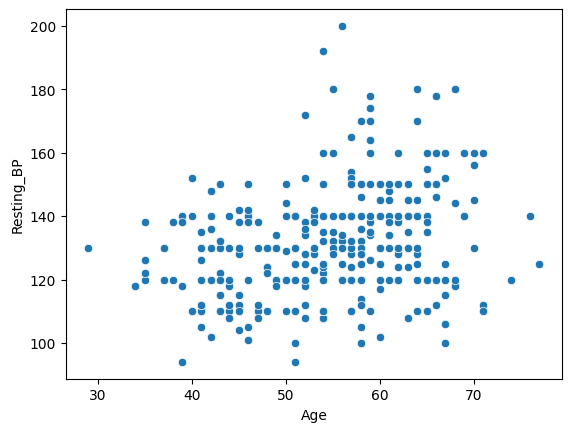

In [40]:
#Influence of age on blood pressure
sns.scatterplot(data=df,x='Age',y='Resting_BP')

<Axes: xlabel='Age', ylabel='Max_heartRate'>

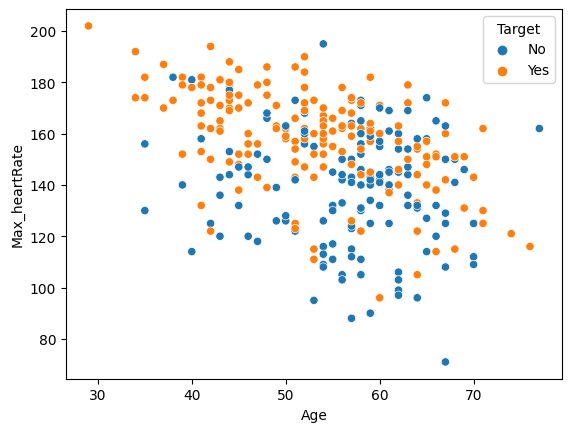

In [41]:
#Relationship between heart rate and age among diseased patients
sns.scatterplot(data=df,x='Age',y='Max_heartRate',hue='Target')

#Examination of diseased patients with respect to categorical features:

In [42]:
#heart-disesed patient dataset
df1=df[df['Target']=='Yes']

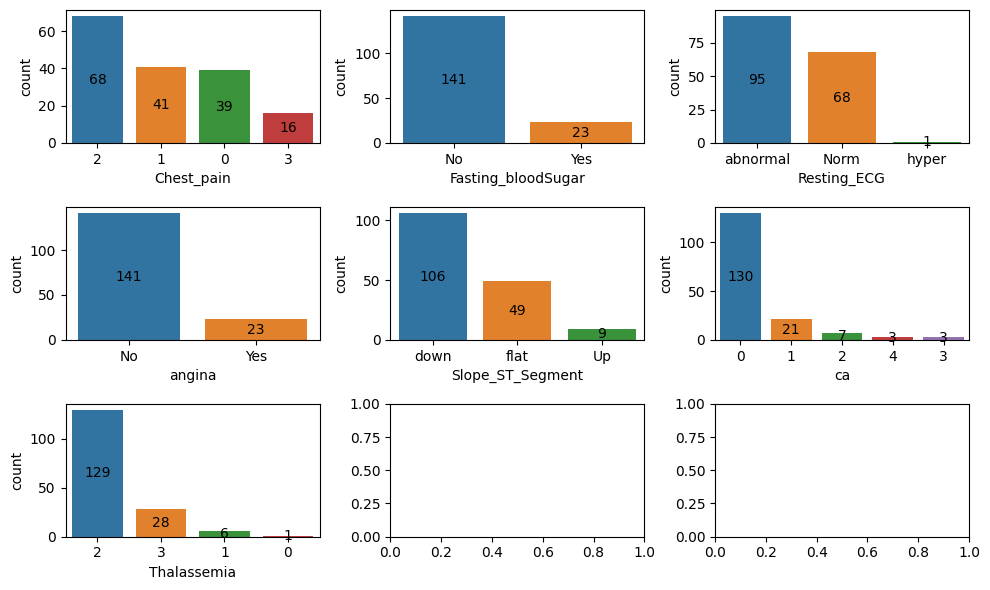

<Figure size 1200x800 with 0 Axes>

In [43]:
plt.rcParams["figure.figsize"] = [10.00, 6.00]
plt.rcParams["figure.autolayout"] = True
fig, ax =plt.subplots(nrows=3,ncols=3)
plt.figure(figsize=(12,8))
g=sns.countplot(data=df1,x='Chest_pain',order=df1['Chest_pain'].value_counts(ascending=False).index,ax=ax[0,0])
g.bar_label(container=g.containers[0],labels=df1['Chest_pain'].value_counts(ascending=False).values,label_type='center')

g=sns.countplot(data=df1,x='Fasting_bloodSugar',order=df1['Fasting_bloodSugar'].value_counts(ascending=False).index,ax=ax[0,1])
g.bar_label(container=g.containers[0],labels=df1['Fasting_bloodSugar'].value_counts(ascending=False).values,label_type='center')

g=sns.countplot(data=df1,x='Resting_ECG',order=df1['Resting_ECG'].value_counts(ascending=False).index,ax=ax[0,2])
g.bar_label(container=g.containers[0],labels=df1['Resting_ECG'].value_counts(ascending=False).values,label_type='center')

g=sns.countplot(data=df1,x='angina',order=df1['angina'].value_counts(ascending=False).index,ax=ax[1,0])
g.bar_label(container=g.containers[0],labels=df1['angina'].value_counts(ascending=False).values,label_type='center')

g=sns.countplot(data=df1,x='Slope_ST_Segment',order=df1['Slope_ST_Segment'].value_counts(ascending=False).index,ax=ax[1,1])
g.bar_label(container=g.containers[0],labels=df1['Slope_ST_Segment'].value_counts(ascending=False).values,label_type='center')

g=sns.countplot(data=df1,x='ca',order=df1['ca'].value_counts(ascending=False).index,ax=ax[1,2])
g.bar_label(container=g.containers[0],labels=df1['ca'].value_counts(ascending=False).values,label_type='center')

g=sns.countplot(data=df1,x='Thalassemia',order=df1['Thalassemia'].value_counts(ascending=False).index,ax=ax[2,0])
g.bar_label(container=g.containers[0],labels=df1['Thalassemia'].value_counts(ascending=False).values,label_type='center')


fig.show()